## Import neccessary libraries

In [1]:
import pandas as pd
import numpy as np

In [2]:
### Read the dataset
train = pd.read_csv("Assignment_train.csv")
train.head()

,DEALER ID,APPLICATION LOGIN DATE,HDB BRANCH NAME,HDB BRANCH STATE,FIRST NAME,MIDDLE NAME,LAST NAME,mobile,AADHAR VERIFIED,Cibil Score,...,Phone Social Premium.shaadi,Phone Social Premium.skype,Phone Social Premium.toi,Phone Social Premium.whatsapp,Phone Social Premium.yatra,Phone Social Premium.zoho,phone_digitalage,phone_nameMatchScore,phone_phoneFootprintStrengthOverall,Application Status
0,106989,07/20/2022,DELHI-SF,DELHI,SUNIL,NaN,CHANDER,9210574080,NO,726,...,0.0,0.0,1.0,NaN,NaN,0.0,5324.0,67.222222,High,APPROVED
1,108975,07/28/2022,PATNA-SF,BIHAR,AMRIT,NaN,KUMAR,8877987018,NO,NaN,...,0.0,0.0,0.0,NaN,NaN,0.0,1998.0,100.000000,High,APPROVED
2,111004,07/15/2022,DARJEELING-SF,WEST BENGAL,ANIMESH,NaN,THAPA,8910862135,NO,737,...,0.0,0.0,0.0,NaN,NaN,0.0,-1.0,-1.000000,Low,APPROVED
3,192020,07/04/22,SAHARANPUR-SF,UTTAR PRADESH,ADITYA,NaN,SINGH,9758428017,NO,713,...,0.0,0.0,1.0,NaN,NaN,0.0,1998.0,72.777778,High,APPROVED
4,55095,07/15/2022,MODASA-SF,GUJARAT,PARMAR,HARESHBHAI,AMRUTBHAI,9687028486,NO,669,...,0.0,0.0,1.0,NaN,NaN,0.0,1998.0,68.095238,High,DECLINED


In [3]:
## check the shape of the dataset
train.shape

(10000, 55)

In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 55 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   DEALER ID                            10000 non-null  int64  
 1   APPLICATION LOGIN DATE               10000 non-null  object 
 2   HDB BRANCH NAME                      9999 non-null   object 
 3   HDB BRANCH STATE                     9146 non-null   object 
 4   FIRST NAME                           10000 non-null  object 
 5   MIDDLE NAME                          2855 non-null   object 
 6   LAST NAME                            9319 non-null   object 
 7   mobile                               10000 non-null  int64  
 8   AADHAR VERIFIED                      10000 non-null  object 
 9   Cibil Score                          5703 non-null   object 
 10  MOBILE VERIFICATION                  10000 non-null  bool   
 11  DEALER NAME                  

In [5]:
## Explore the Target variable
train["Application Status"].value_counts()

Application Status
APPROVED    6677
DECLINED    3323
Name: count, dtype: int64

### Check the Null values

In [6]:
train.isna().sum()/len(train)*100

DEALER ID                               0.00
APPLICATION LOGIN DATE                  0.00
HDB BRANCH NAME                         0.01
HDB BRANCH STATE                        8.54
FIRST NAME                              0.00
MIDDLE NAME                            71.45
LAST NAME                               6.81
mobile                                  0.00
AADHAR VERIFIED                         0.00
Cibil Score                            42.97
MOBILE VERIFICATION                     0.00
DEALER NAME                             0.04
TOTAL ASSET COST                       51.08
ASSET CTG                              51.08
ASSET MODEL NO                          0.00
APPLIED AMOUNT                          0.00
PRIMARY ASSET MAKE                      0.00
Primary Asset Model No                  0.00
Personal Email Address                  0.00
MARITAL STATUS                         48.94
GENDER                                  0.00
DOB                                     0.00
AGE       

## Drop the columns that have more than 70% of their data missing.

In [7]:
## Remove these columns because these columns have lot of missing values and irrelantive columns.
train.drop(columns=['MIDDLE NAME','Phone Social Premium.a23games','Phone Social Premium.isWABusiness',
                    'Phone Social Premium.jiomart','Phone Social Premium.my11','Phone Social Premium.rummycircle',
                    'Phone Social Premium.whatsapp','Phone Social Premium.yatra'],axis=1,inplace=True)

In [8]:
train.shape

(10000, 47)

In [9]:
train.columns

Index(['DEALER ID', 'APPLICATION LOGIN DATE', 'HDB BRANCH NAME',
       'HDB BRANCH STATE', 'FIRST NAME', 'LAST NAME', 'mobile',
       'AADHAR VERIFIED', 'Cibil Score', 'MOBILE VERIFICATION', 'DEALER NAME',
       'TOTAL ASSET COST', 'ASSET CTG', 'ASSET MODEL NO', 'APPLIED AMOUNT',
       'PRIMARY ASSET MAKE', 'Primary Asset Model No',
       'Personal Email Address', 'MARITAL STATUS', 'GENDER', 'DOB', 'AGE',
       'ADDRESS TYPE', 'EMPLOY CONSTITUTION', 'EMPLOYER NAME', 'EMPLOYER TYPE',
       'Pan Name', 'name', 'vpa', 'upi_name', 'Phone Social Premium.amazon',
       'Phone Social Premium.byjus', 'Phone Social Premium.flipkart',
       'Phone Social Premium.housing', 'Phone Social Premium.indiamart',
       'Phone Social Premium.instagram', 'Phone Social Premium.jeevansaathi',
       'Phone Social Premium.microsoft', 'Phone Social Premium.paytm',
       'Phone Social Premium.shaadi', 'Phone Social Premium.skype',
       'Phone Social Premium.toi', 'Phone Social Premium.zoho',
     

In [10]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 47 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   DEALER ID                            10000 non-null  int64  
 1   APPLICATION LOGIN DATE               10000 non-null  object 
 2   HDB BRANCH NAME                      9999 non-null   object 
 3   HDB BRANCH STATE                     9146 non-null   object 
 4   FIRST NAME                           10000 non-null  object 
 5   LAST NAME                            9319 non-null   object 
 6   mobile                               10000 non-null  int64  
 7   AADHAR VERIFIED                      10000 non-null  object 
 8   Cibil Score                          5703 non-null   object 
 9   MOBILE VERIFICATION                  10000 non-null  bool   
 10  DEALER NAME                          9996 non-null   object 
 11  TOTAL ASSET COST             

### Check the summary of the dataset

In [11]:
train.describe()

,DEALER ID,mobile,TOTAL ASSET COST,ASSET MODEL NO,APPLIED AMOUNT,DOB,AGE,Phone Social Premium.amazon,Phone Social Premium.byjus,Phone Social Premium.flipkart,...,Phone Social Premium.instagram,Phone Social Premium.jeevansaathi,Phone Social Premium.microsoft,Phone Social Premium.paytm,Phone Social Premium.shaadi,Phone Social Premium.skype,Phone Social Premium.toi,Phone Social Premium.zoho,phone_digitalage,phone_nameMatchScore
count,10000.000000,1.000000e+04,4892.000000,10000.000000,1.000000e+04,1.000000e+04,10000.000000,8084.000000,8052.000000,8168.000000,...,3370.000000,8171.000000,8128.000000,8243.000000,8221.000000,8215.000000,8057.000000,8218.000000,9996.000000,9996.000000
mean,102936.459100,8.630041e+09,97612.518397,150660.758500,9.179673e+04,9.813396e+06,31.796100,0.486517,0.149652,0.748408,...,0.913353,0.050667,0.149852,0.820090,0.017516,0.147657,0.250838,0.000608,1652.937975,55.645558
std,37830.984431,1.077717e+09,16745.027041,20847.995017,2.700018e+04,8.930654e+06,11.202075,0.499849,0.356752,0.433954,...,0.281359,0.219330,0.356949,0.384136,0.131192,0.354781,0.433522,0.024660,984.114248,42.100616
min,49849.000000,6.000042e+09,51873.000000,124587.000000,1.040000e+04,1.011943e+06,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.000000,-1.000000
25%,79953.750000,7.894858e+09,88425.500000,139542.000000,8.000000e+04,1.012000e+06,25.000000,0.000000,0.000000,0.000000,...,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,809.000000,-1.000000
50%,94631.000000,8.867377e+09,94400.000000,143238.000000,9.000000e+04,7.112001e+06,31.000000,0.000000,0.000000,1.000000,...,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1988.000000,73.571429
75%,108463.000000,9.588181e+09,103499.250000,160216.000000,9.900000e+04,1.605197e+07,39.000000,1.000000,0.000000,1.000000,...,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,2031.000000,96.000000
max,202616.000000,9.999977e+09,241116.000000,201897.000000,1.420000e+06,3.112200e+07,79.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,6311.000000,100.000000


### Remove the duplicate values from the dataset

In [12]:
print(f'Duplicate rows in the datsaset :{train.duplicated().sum()}\n') 

print('\nDisplaying the duplicated rows')
train[train.duplicated(keep=False)]

Duplicate rows in the datsaset :9


Displaying the duplicated rows


,DEALER ID,APPLICATION LOGIN DATE,HDB BRANCH NAME,HDB BRANCH STATE,FIRST NAME,LAST NAME,mobile,AADHAR VERIFIED,Cibil Score,MOBILE VERIFICATION,...,Phone Social Premium.microsoft,Phone Social Premium.paytm,Phone Social Premium.shaadi,Phone Social Premium.skype,Phone Social Premium.toi,Phone Social Premium.zoho,phone_digitalage,phone_nameMatchScore,phone_phoneFootprintStrengthOverall,Application Status
2891,105707,07/31/2022,ROORKEE-SF,UTTARAKHAND,SONU,KUMAR,7248847715,NO,NaN,True,...,0.0,0.0,0.0,0.0,0.0,0.0,-1.0,-1.000000,Low,DECLINED
2932,107519,07/29/2022,LALITPUR-SF,UTTAR PRADESH,RAMJI,LODHI,9116257288,NO,660,True,...,0.0,1.0,0.0,0.0,0.0,0.0,2657.0,-1.000000,Medium,DECLINED
3323,107700,07/31/2022,DELHI-SF,DELHI,SHOBHA,DEVI,9654941564,NO,712,True,...,0.0,1.0,0.0,0.0,0.0,0.0,1503.0,100.000000,Medium,APPROVED
3518,107700,07/31/2022,DELHI-SF,DELHI,SHOBHA,DEVI,9654941564,NO,712,True,...,0.0,1.0,0.0,0.0,0.0,0.0,1503.0,100.000000,Medium,APPROVED
4067,107187,07/12/22,DHAMPUR-SF,NaN,ABDUL,KADIR,6397903454,NO,NaN,True,...,0.0,0.0,0.0,0.0,0.0,0.0,1988.0,-1.000000,Medium,DECLINED
5684,91969,07/04/22,HALDWANI-SF,UTTARAKHAND,MOHD,RAFAT,9639208194,NO,NaN,True,...,NaN,NaN,NaN,NaN,NaN,NaN,281.0,100.000000,Low,DECLINED
5848,110588,07/28/2022,INDAPUR-SF,MAHARASHTRA,SAMBHAJI,BHONG,9890577452,NO,770,True,...,0.0,1.0,0.0,0.0,0.0,0.0,4117.0,-1.000000,Medium,DECLINED
5926,91969,07/04/22,HALDWANI-SF,UTTARAKHAND,MOHD,RAFAT,9639208194,NO,NaN,True,...,NaN,NaN,NaN,NaN,NaN,NaN,281.0,100.000000,Low,DECLINED
6203,85814,07/12/22,LALGANJ-SF,UTTAR PRADESH,FARHAN,AHMAD,9793879701,NO,NaN,True,...,0.0,1.0,1.0,0.0,0.0,0.0,486.0,85.714286,High,DECLINED
6599,91583,07/08/22,DELHI SOUTH-SF,DELHI,KRISHNA,KUMAR,9534011151,NO,NaN,True,...,1.0,1.0,0.0,1.0,1.0,0.0,2396.0,90.000000,High,DECLINED


In [13]:
train= train.drop_duplicates(keep='first')

In [14]:
print(f'Duplicate rows in the datsaset :{train.duplicated().sum()}\n') 

print('\nDisplaying the duplicated rows')
train[train.duplicated(keep=False)]

Duplicate rows in the datsaset :0


Displaying the duplicated rows


,DEALER ID,APPLICATION LOGIN DATE,HDB BRANCH NAME,HDB BRANCH STATE,FIRST NAME,LAST NAME,mobile,AADHAR VERIFIED,Cibil Score,MOBILE VERIFICATION,...,Phone Social Premium.microsoft,Phone Social Premium.paytm,Phone Social Premium.shaadi,Phone Social Premium.skype,Phone Social Premium.toi,Phone Social Premium.zoho,phone_digitalage,phone_nameMatchScore,phone_phoneFootprintStrengthOverall,Application Status


In [15]:
train.shape

(9991, 47)

**After removing the duplicate data, we are left with (9991, 47) records**

## Visualization of unique values in Target variable

In [16]:
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

In [17]:
train["Application Status"].value_counts()

Application Status
APPROVED    6676
DECLINED    3315
Name: count, dtype: int64

Approved: 6676, Declined: 3315


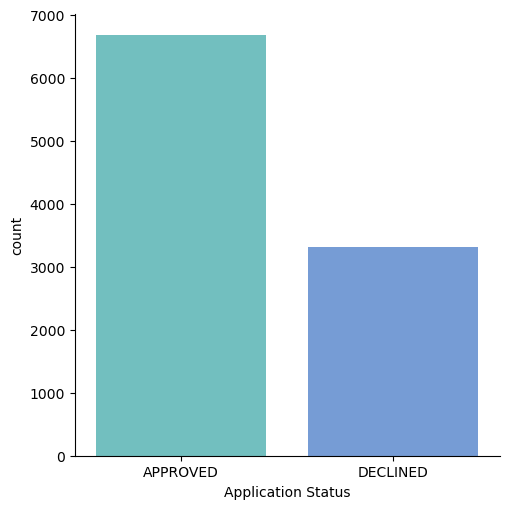

In [18]:
approved = train[train['Application Status']=='APPROVED'].shape[0]
declined = train[train['Application Status']=='DECLINED'].shape[0]
print("Approved: " + str(approved) + ", Declined: " + str(declined))
sns.catplot(data=train, x="Application Status", kind="count", palette="winter_r", alpha=.6)
plt.show()

**Report**
* The target classes are imbalanced
* Class imbalance is a scenario that arises when we have unequal distribution of class in a dataset i.e. the no. of data points in the `APPROVED` class (majority class) very large compared to that of the `DECLINED` class (minority class)
* If the imbalanced data is not treated beforehand, then this will degrade the performance of the classifier model.
* Hence we should handle imbalanced data with certain methods.


**How to handle Imbalance Data ?**

Resampling data is one of the most commonly preferred approaches to deal with an imbalanced dataset. There are broadly two types of methods for this 
1.  Undersampling
2.  Oversampling.
* In most cases, oversampling is preferred over undersampling techniques. The reason being, in undersampling we tend to remove instances from data that may be carrying some important information.
* **SMOTE:** Synthetic Minority Oversampling Technique
* SMOTE is an oversampling technique where the synthetic samples are generated for the minority class.
* Hybridization techniques involve combining both undersampling and oversampling techniques. This is done to optimize the performance of classifier models for the samples created as part of these techniques.
* It only duplicates the data and it won't add and new information. Hence we look at some different techniques.

In [19]:
train.dtypes

DEALER ID                                int64
APPLICATION LOGIN DATE                  object
HDB BRANCH NAME                         object
HDB BRANCH STATE                        object
FIRST NAME                              object
LAST NAME                               object
mobile                                   int64
AADHAR VERIFIED                         object
Cibil Score                             object
MOBILE VERIFICATION                       bool
DEALER NAME                             object
TOTAL ASSET COST                       float64
ASSET CTG                               object
ASSET MODEL NO                           int64
APPLIED AMOUNT                           int64
PRIMARY ASSET MAKE                      object
Primary Asset Model No                  object
Personal Email Address                  object
MARITAL STATUS                          object
GENDER                                  object
DOB                                      int64
AGE          

## Type casting the variables

* Here `APPLICATION LOGIN DATE` and `DOB` are datetime column . so we need to convert this into a datetime format.
* Here `Boolean Social Media` yes or no so these are bolean values so we need convert to object datatypes.

In [20]:
from dateutil import parser

train['APPLICATION LOGIN DATE'] = train['APPLICATION LOGIN DATE'].apply(lambda date_str: parser.parse(date_str))
train['DOB'] = pd.to_datetime(train['DOB'])

In [21]:
train['Phone Social Premium.amazon'] = train['Phone Social Premium.amazon'].astype('object')
train['Phone Social Premium.byjus'] = train['Phone Social Premium.byjus'].astype('object')
train['Phone Social Premium.flipkart'] = train['Phone Social Premium.flipkart'].astype('object')
train['Phone Social Premium.housing'] = train['Phone Social Premium.housing'].astype('object')
train['Phone Social Premium.indiamart'] = train['Phone Social Premium.indiamart'].astype('object')
train['Phone Social Premium.instagram'] = train['Phone Social Premium.instagram'].astype('object')
train['Phone Social Premium.jeevansaathi'] = train['Phone Social Premium.jeevansaathi'].astype('object')
train['Phone Social Premium.microsoft'] = train['Phone Social Premium.microsoft'].astype('object')
train['Phone Social Premium.paytm'] = train['Phone Social Premium.paytm'].astype('object')
train['Phone Social Premium.skype'] = train['Phone Social Premium.skype'].astype('object')
train['Phone Social Premium.shaadi'] = train['Phone Social Premium.shaadi'].astype('object')
train['Phone Social Premium.toi'] = train['Phone Social Premium.toi'].astype('object')
train['Phone Social Premium.zoho'] = train['Phone Social Premium.zoho'].astype('object')


## Univariate Analysis

In [22]:
numeric_features=['TOTAL ASSET COST','APPLIED AMOUNT','AGE','phone_digitalage','phone_nameMatchScore']

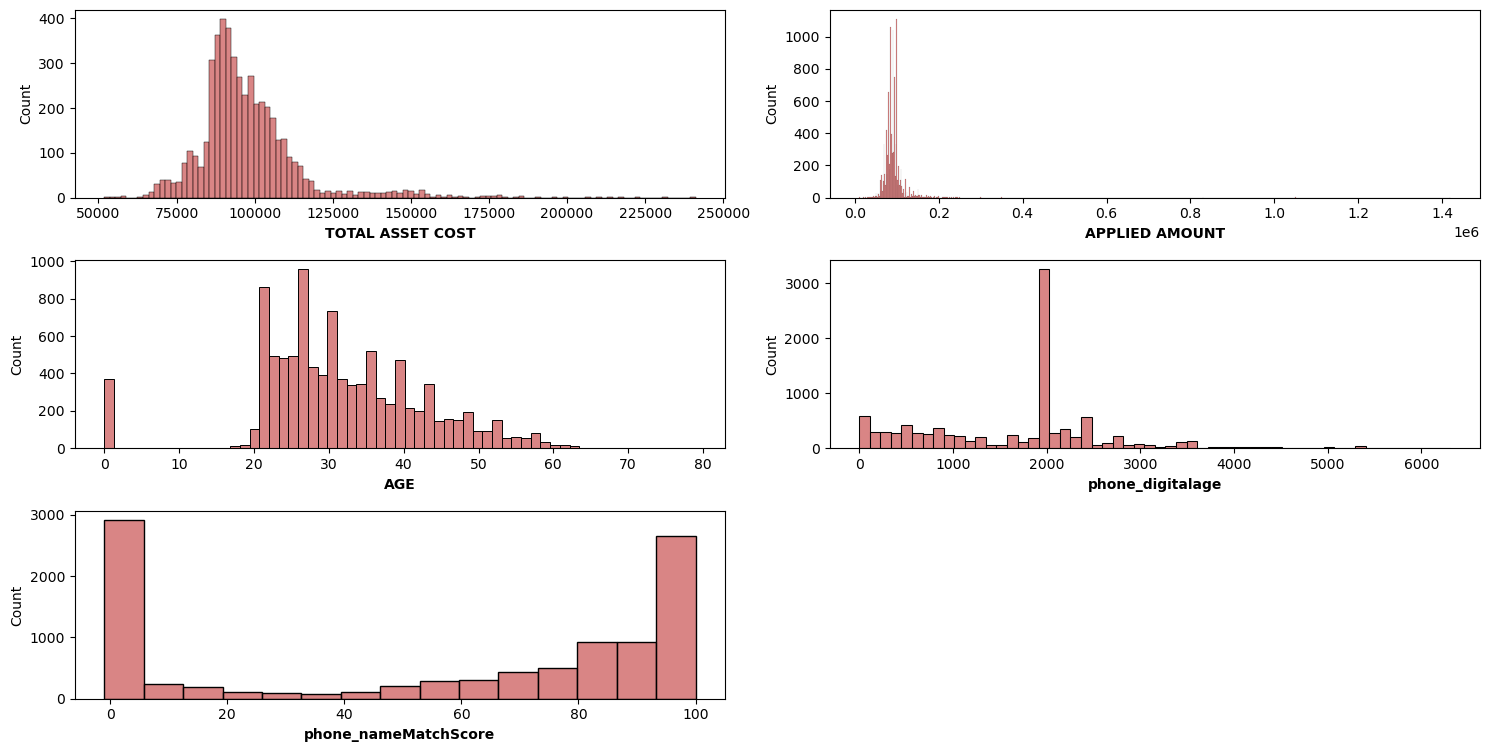

In [23]:
plt.figure(figsize=(15, 150))
for i, col in enumerate(numeric_features):
    plt.subplot(60, 2, i+1)
    plt.xlabel(col, weight='bold')
    sns.histplot(x=train[col], color='indianred')
    plt.tight_layout()

### Here's a summary of the analysis of the numerical columns:

1. **TOTAL ASSET COST**:
   - The data is slightly skewed to the right.
   - Most assets cost between **75,000** and **125,000**. Fewer assets cost more than this.
   - Assets that cost more than **150,000** are rare.

2. **APPLIED AMOUNT**:
   - The data is heavily skewed to the right.
   - Most people apply for small amounts. Few people apply for large amounts over **500,000**.

3. **AGE**:
   - The age of applicants is mostly between **20** and **40** years old.
   - There is a small peak in the number of applicants around **30-35** years old.
   - Few applicants are over **50** years old.
   - Some applicants have an age of **0**, which is not possible. We will replace these values with "Not Available" (NA).

4. **phone_digitalage**:
   - Many users have phones from around **2000**.
   - The data is skewed to the right, with most values below **2500**. Some values go up to **6000**.

5. **phone_nameMatchScore**:
   - The score has two main groups: one near **0** and one near **100**.
   - This means that most phone name matches either fail or succeed completely. Few matches are in between.


In [24]:
train['phone_nameMatchScore'].describe()

count    9987.000000
mean       55.652127
std        42.097092
min        -1.000000
25%        -1.000000
50%        73.571429
75%        96.000000
max       100.000000
Name: phone_nameMatchScore, dtype: float64

### Extract the categorical columns

In [25]:
categorical_features = ['HDB BRANCH STATE','AADHAR VERIFIED','ASSET CTG','PRIMARY ASSET MAKE', 'MARITAL STATUS',
                        'GENDER','ADDRESS TYPE','EMPLOY CONSTITUTION','EMPLOYER TYPE', 'Phone Social Premium.amazon', 
                        'Phone Social Premium.byjus', 'Phone Social Premium.flipkart', 'Phone Social Premium.housing', 
                        'Phone Social Premium.indiamart', 'Phone Social Premium.instagram', 'Phone Social Premium.jeevansaathi', 
                        'Phone Social Premium.microsoft', 'Phone Social Premium.paytm', 'Phone Social Premium.shaadi',
                        'Phone Social Premium.toi','Phone Social Premium.skype', 'Phone Social Premium.zoho','phone_phoneFootprintStrengthOverall']

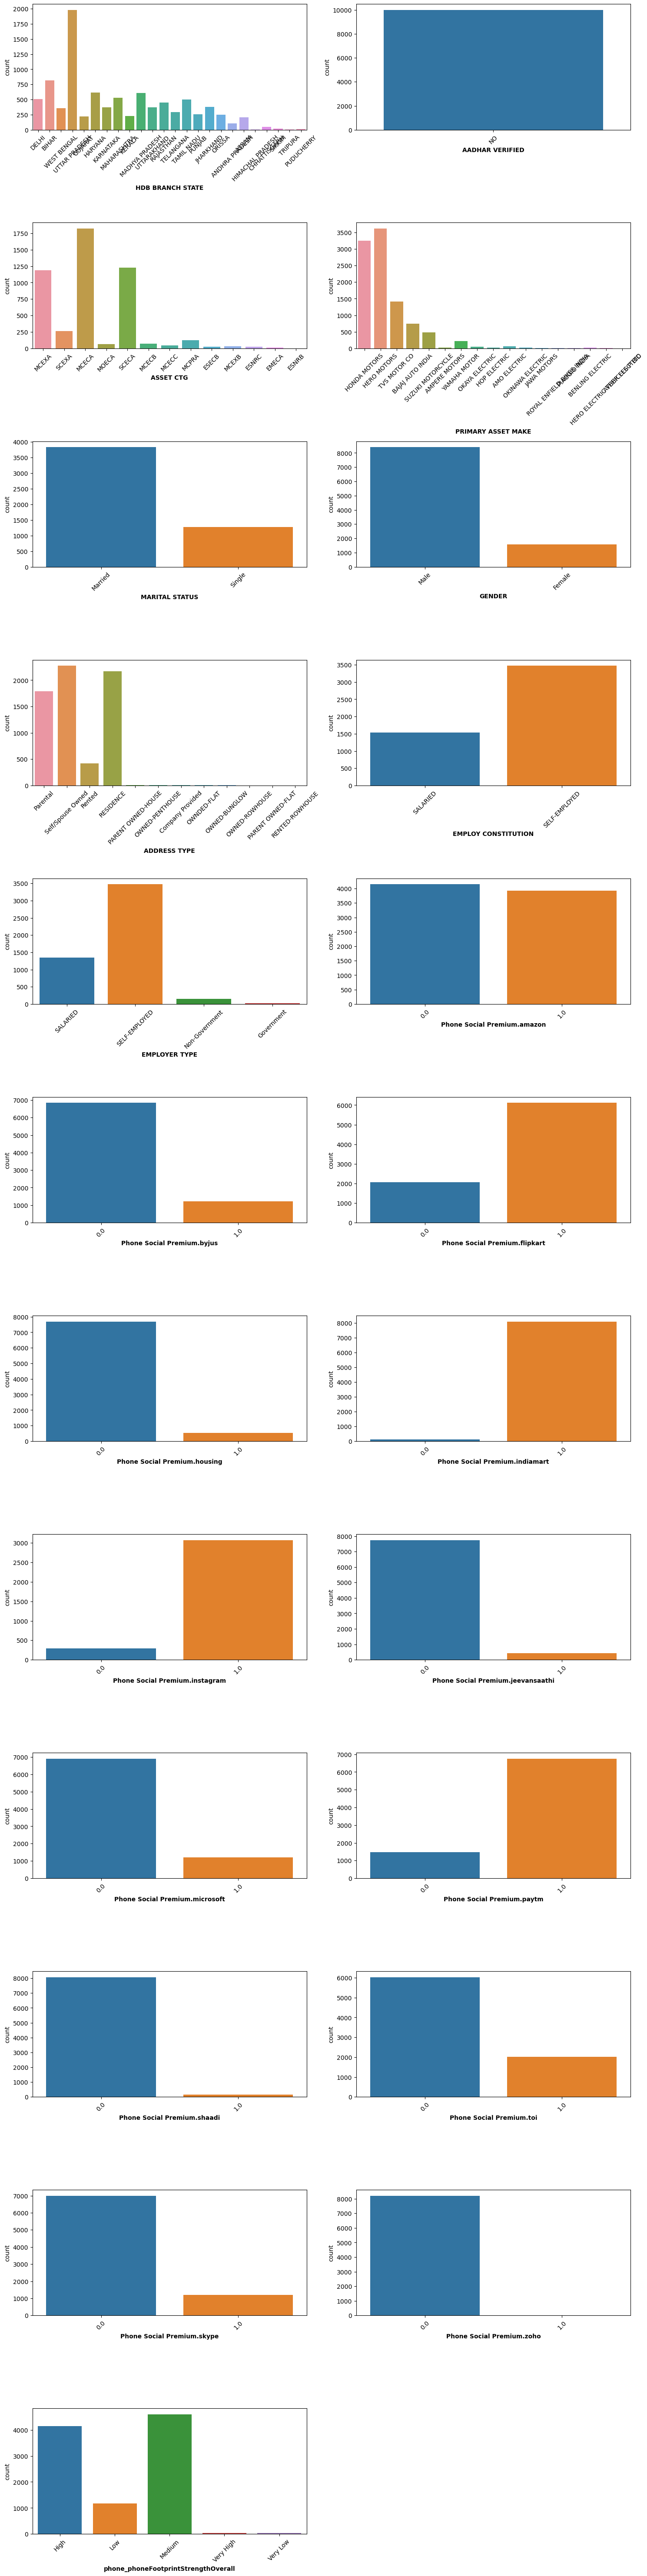

In [26]:
plt.figure(figsize=(15, 300))
for i, col in enumerate(categorical_features):
    plt.subplot(60, 2, i+1)
    sns.countplot(x=train[col])
    plt.xlabel(col, weight='bold')
    plt.xticks(rotation=45)
    plt.tight_layout()

**Summary of Categorical Columns**

1. **HBD BRANCH STATE**:
   - There are 24 unique state values in this column.
   - The most common state is **Uttar Pradesh**.
   - The least common states are **Himachal Pradesh** and **Tripura**.

2. **AADHAR VERIFIED**:
   - There is only one unique value in this column: **No**.
   - Since there is no variation in this column, it does not provide any useful information, so we will drop it.

3. **ASSET CTG**:
   - There are 13 unique categories of assets.
   - The most common category is **MCECA**.
   - The least common categories are **EMECA** and **ESNRB**.
   - We will keep the top 3 most common categories and group the rest as "Others".

4. **PRIMARY ASSET MAKE**:
   - There are 17 unique vehicle manufacturer names.
   - The most common manufacturers are **Hero Motors** and **Honda Motors**.
   - This suggests that most people apply for loans to buy vehicles from these companies.

5. **MARITAL STATUS**:
   - Most people who applied for loans are married.

6. **GENDER**:
   - More men applied for loans than women.

7. **ADDRESS TYPE**:
   - The most common address types are **Self/Spouse Owned**, **Residence**, and **Parental**.

8. **EMPLOYMENT CONSTITUTION**:
   - Most people who applied for loans are self-employed.

9. **EMPLOYER TYPE**:
   - Most people who applied for loans are self-employed.


## Grouping of Categorical Columns

1. **ASSET CTG**:
   - We will keep only the top 3 categories: **MCECA**, **SCECA**, and **MCEXA**.
   - All other categories will be labeled as **Others**.

2. **PRIMARY ASSET MAKE**:
   - We will keep only the top categories, such as **Hero Motors**, **Honda Motors**, etc.
   - All other categories will be labeled as **Others**.

3. **ADDRESS TYPE**:
   - We will replace similar or synonymous categories with standardized labels to ensure consistency.

4. **AGE**:
   - We will perform binning on the age column to group ages into categories.

5. **Cibil Score**:
   - We will perform binning on the Cibil Score column to group scores into categories.

In [27]:
train['ASSET CTG'] = np.where(train['ASSET CTG'].isin(['MCECA','SCECA','MCEXA']), train['ASSET CTG'], 'Others')
train['PRIMARY ASSET MAKE'] = np.where(train['PRIMARY ASSET MAKE'].isin(['HERO MOTORS','HONDA MOTORS',
                                                                         'TVS MOTOR CO','BAJAJ AUTO INDIA',
                                                                         'SUZUKI MOTORCYCLE','YAMAHA MOTOR']), train['PRIMARY ASSET MAKE'], 'Others')
train['ADDRESS TYPE'] = train['ADDRESS TYPE'].replace({
    'Self/Spouse Owned': 'Owned', 
    'OWNED-BUNGLOW': 'Owned', 
    'OWNED-PENTHOUSE': 'Owned',
    'OWNDED-FLAT':'Owned',
    'OWNED-ROWHOUSE':'Owned',
    'Parental': 'Parental',
    'PARENT OWNED-HOUSE' : 'Parental',
    'PARENT OWNED-FLAT' : 'Parental',
    'Rented': 'Rented',
    'Company Provided' : 'Rented',
    'RENTED-ROWHOUSE': 'Rented',
})

# Replace zero values with NaN
train['AGE'] = train['AGE'].replace(0, np.nan)

# Define bins based on the age distribution
bins = [17, 25, 35, 45, 55, 65, np.inf]  # Adjust the ranges according to the distribution
labels = ['18-25', '26-35', '36-45', '46-55', '56-65', '65+']  # Labels for the bins

# Perform binning on the age column
train['AGE'] = pd.cut(train['AGE'], bins=bins, labels=labels, right=True)
train['AGE'] = train['AGE'].astype('object')

# Convert the Cibil Score column to numeric, forcing errors to NaN
train['Cibil Score'] = pd.to_numeric(train['Cibil Score'], errors='coerce')

# Define bins and labels for Cibil Score
cibil_bins = [300, 550, 650, 750, 850]  # Adjust the ranges as needed
cibil_labels = ['Poor', 'Fair', 'Good', 'Excellent']

# Perform binning on the cleaned Cibil Score column
train['Cibil Score'] = pd.cut(train['Cibil Score'], bins=cibil_bins, labels=cibil_labels, right=True)
train['Cibil Score'] = train['Cibil Score'].astype('object')

# Drop this column because these column don't give any informatin.
# AADHAR VERIFIED, MOBILE VERIFICATION,zoho, shaadi, jeevansaathi, indiamart, housing,
train = train.drop(columns=['AADHAR VERIFIED','MOBILE VERIFICATION', 'Phone Social Premium.zoho',
                            'Phone Social Premium.shaadi','Phone Social Premium.jeevansaathi',
                            'Phone Social Premium.indiamart','Phone Social Premium.housing'])

In [28]:
train.shape

(9991, 40)

In [29]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9991 entries, 0 to 9999
Data columns (total 40 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   DEALER ID                            9991 non-null   int64         
 1   APPLICATION LOGIN DATE               9991 non-null   datetime64[ns]
 2   HDB BRANCH NAME                      9990 non-null   object        
 3   HDB BRANCH STATE                     9138 non-null   object        
 4   FIRST NAME                           9991 non-null   object        
 5   LAST NAME                            9310 non-null   object        
 6   mobile                               9991 non-null   int64         
 7   Cibil Score                          5661 non-null   object        
 8   DEALER NAME                          9987 non-null   object        
 9   TOTAL ASSET COST                     4892 non-null   float64       
 10  ASSET CTG        

## BIVARIATE ANALYSIS

In [30]:
numerical_columns = [['TOTAL ASSET COST','APPLIED AMOUNT','phone_digitalage','phone_nameMatchScore']]

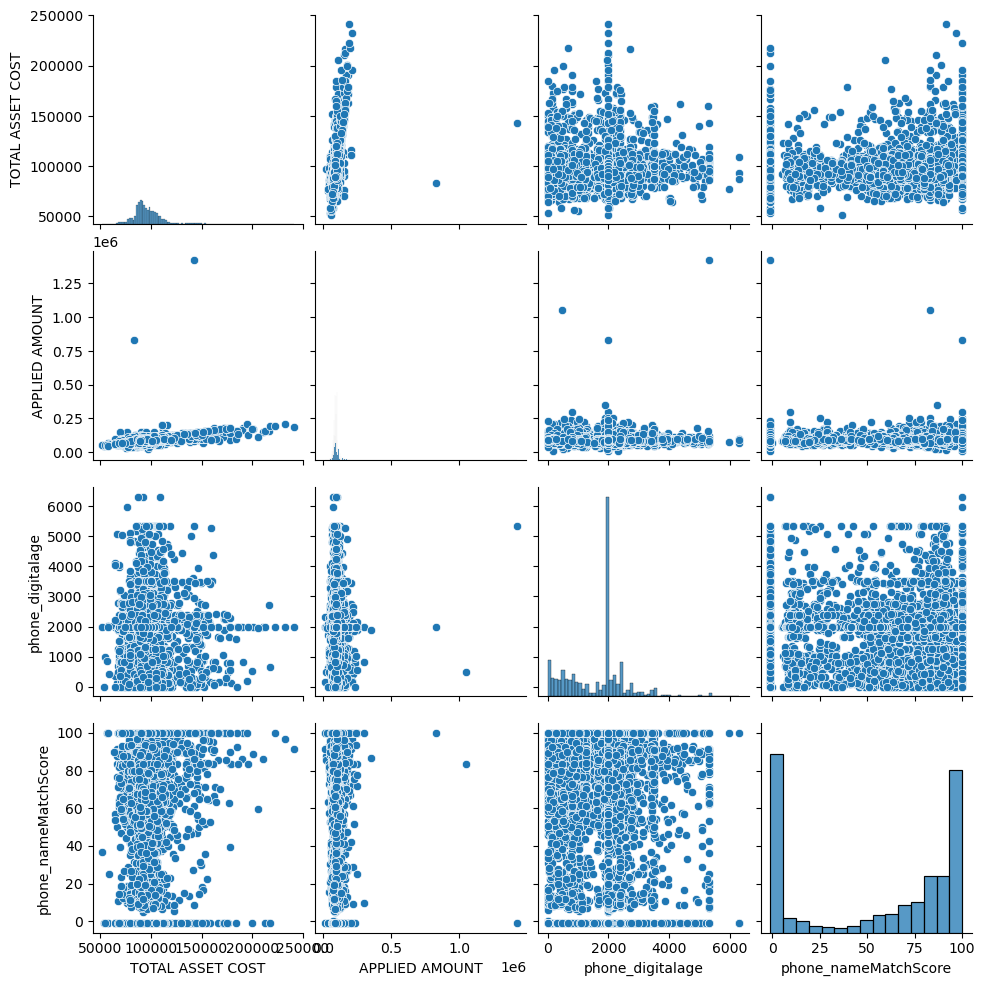

In [31]:
# Create scatter plots for each pair
sns.pairplot(train[['TOTAL ASSET COST', 'APPLIED AMOUNT', 'phone_digitalage', 'phone_nameMatchScore']])
plt.show()


**Due to Presence of Outlier it impossible to draw any conclusion.**

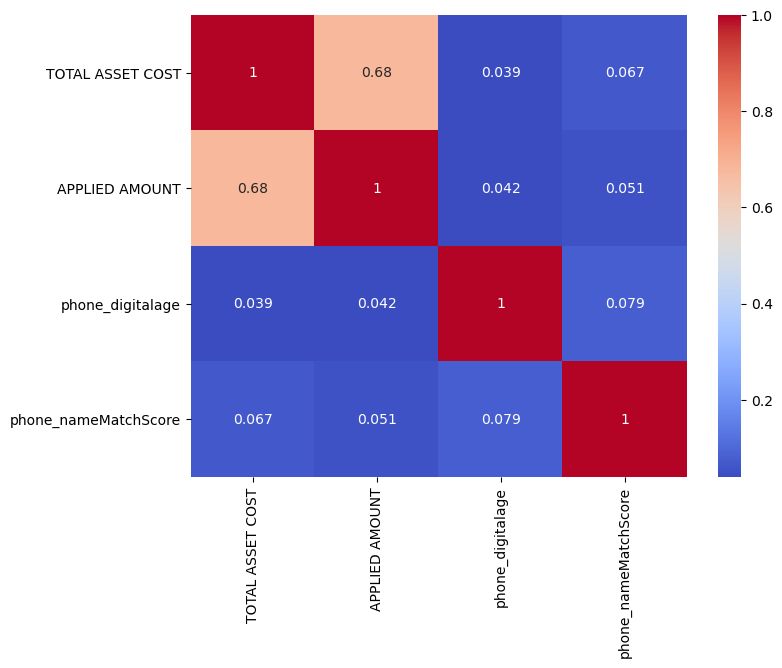

In [32]:
correlation_matrix = train[['TOTAL ASSET COST', 'APPLIED AMOUNT', 'phone_digitalage', 'phone_nameMatchScore']].corr(method='spearman')
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.show()

**Correlation Matrix Summary**

1. **TOTAL ASSET COST and APPLIED AMOUNT**:
   - Correlation coefficient: **0.68**
   - There is a moderate positive correlation between **TOTAL ASSET COST** and **APPLIED AMOUNT**. This means that as the applied amount increases, the total asset cost tends to increase as well.

2. **TOTAL ASSET COST and phone_digitalage**:
   - Correlation coefficient: **0.039**
   - There is a very weak positive correlation between **TOTAL ASSET COST** and **phone_digitalage**. This suggests almost no relationship between these two variables.

3. **TOTAL ASSET COST and phone_nameMatchScore**:
   - Correlation coefficient: **0.067**
   - There is a weak positive correlation between **TOTAL ASSET COST** and **phone_nameMatchScore**. However, this value indicates that the relationship between these two variables is very weak.

4. **APPLIED AMOUNT and phone_digitalage**:
   - Correlation coefficient: **0.042**
   - There is a very weak positive correlation between **APPLIED AMOUNT** and **phone_digitalage**, which implies almost no relationship between the amount applied and the digital age.

5. **APPLIED AMOUNT and phone_nameMatchScore**:
   - Correlation coefficient: **0.051**
   - There is a weak positive correlation between **APPLIED AMOUNT** and **phone_nameMatchScore**. Similar to the earlier correlations, the relationship is almost negligible.

6. **phone_digitalage and phone_nameMatchScore**:
   - Correlation coefficient: **0.079**
   - There is a weak positive correlation between **phone_digitalage** and **phone_nameMatchScore**. However, this is still a low value, indicating a weak relationship.

**Overall Interpretation**

* The strongest correlation in this matrix is between **TOTAL ASSET COST** and **APPLIED AMOUNT** (0.68), which shows a meaningful positive relationship.
* The correlations involving **phone_digitalage** and **phone_nameMatchScore** with the other columns are very weak (close to 0), indicating little to no linear relationship.
* The values closer to 0 indicate that there is minimal to no correlation between the majority of the variables in the heatmap.

### Numerical Vs Categorical 

In [33]:
## create a function which create a violin plot
def plot_violin(df, categorical_column, numerical_column):
    """
    Creates a violin plot for a numerical column versus a categorical column.
    
    Parameters:
    - df: The DataFrame containing the data.
    - categorical_column: The name of the categorical column (str).
    - numerical_column: The name of the numerical column (str).
    """
    plt.figure(figsize=(10, 6))
    sns.violinplot(x=categorical_column, y=numerical_column, data=df)
    plt.title(f'{numerical_column} by {categorical_column}')
    plt.xlabel(categorical_column)
    plt.ylabel(numerical_column)
    plt.xticks(rotation=45)
    plt.show()


## 1. Cibil Score Vs Applied Amount

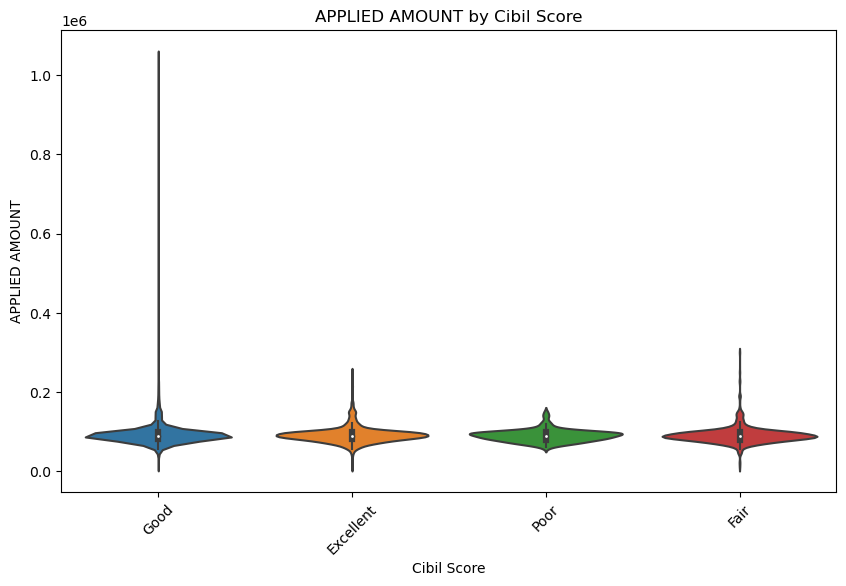

In [34]:
plot_violin(train,"Cibil Score","APPLIED AMOUNT")

**Insights**

1. **Distribution for Good Cibil Score**:
   - The distribution for the **Good** Cibil Score is the widest, indicating a large variability in the applied amounts for individuals with a good score.
   - A significant number of loans have lower amounts, but the long "tail" suggests that some individuals with a good score applied for much higher loan amounts.

2. **Distribution for Excellent Cibil Score**:
   - The **Excellent** category shows a narrower distribution compared to the **Good** category.
   - Most of the applied amounts are concentrated around a specific range, indicating that people with an excellent Cibil score typically apply for a more consistent range of amounts.

3. **Distribution for Poor and Fair Cibil Scores**:
   - For both **Poor** and **Fair** Cibil Score categories, the distribution of **APPLIED AMOUNT** is tightly centered around lower amounts.
   - These groups have fewer applicants applying for higher amounts, as evidenced by the limited spread and concentration near the lower end of the range.

4. **General Trends**:
   - The distribution shows that people with better Cibil Scores (**Good**, **Excellent**) tend to apply for a broader range of amounts, while those with lower Cibil Scores (**Fair**, **Poor**) apply for smaller, more consistent amounts.

**Conclusion**

* Applicants with higher Cibil Scores (especially **Good**) show a wider variance in loan applications, with some requesting significantly higher loan amounts.
* Applicants with lower Cibil Scores (**Fair** and **Poor**) tend to apply for smaller loans, and their distributions are more compact.

### 2. Cibil Score vs TOTAL ASSET COST?

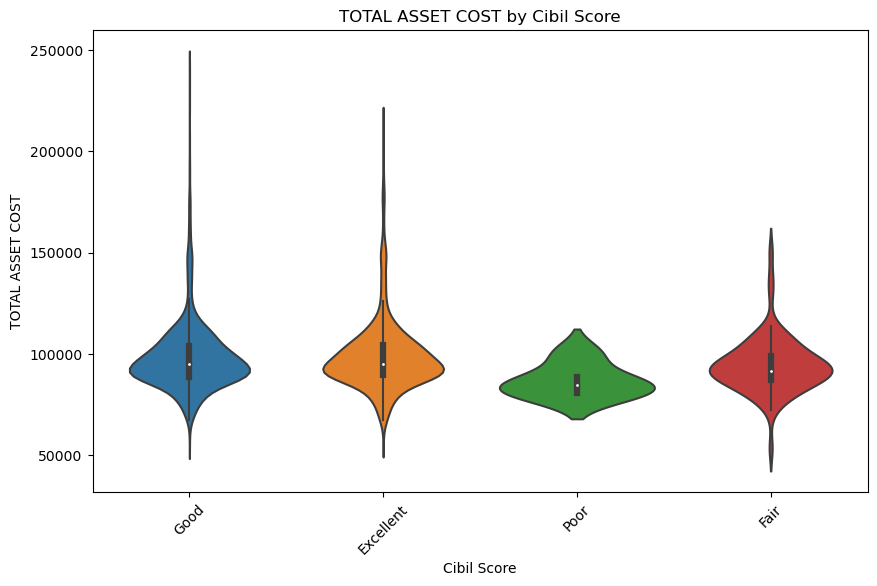

In [35]:
plot_violin(train,"Cibil Score","TOTAL ASSET COST")

**Insights**

1. **Distribution for Good Cibil Score**:
   - The distribution for the **Good** Cibil Score is the widest, suggesting a large variability in the **Total Cost of the Asset** for individuals with a good score.
   - A significant number of loans have lower asset costs, but the long "tail" indicates that some individuals with a good score applied for much higher asset costs.

2. **Distribution for Excellent Cibil Score**:
   - The **Excellent** category shows a narrower distribution compared to the **Good** category.
   - A significant number of loans have lower asset costs, but the long "tail" indicates that some individuals with an excellent score applied for much higher asset costs.
   - Most of the applied amounts are concentrated around a specific range, indicating that people with an excellent Cibil score typically apply for a more consistent range of vehicle costs.

3. **Distribution for Poor and Fair Cibil Scores**:
   - For both **Poor** and **Fair** Cibil Score categories, the distribution of **Total Cost of the Asset** is centered around lower asset costs.
   - These groups have fewer applicants applying for higher amounts, as evidenced by the limited spread and concentration near the lower end of the range.

4. **General Trends**:
   - The distribution shows that people with better Cibil Scores (**Good**, **Excellent**) tend to apply for a broader range of vehicle costs, while those with lower Cibil Scores (**Fair**, **Poor**) apply for smaller, more consistent vehicle costs.


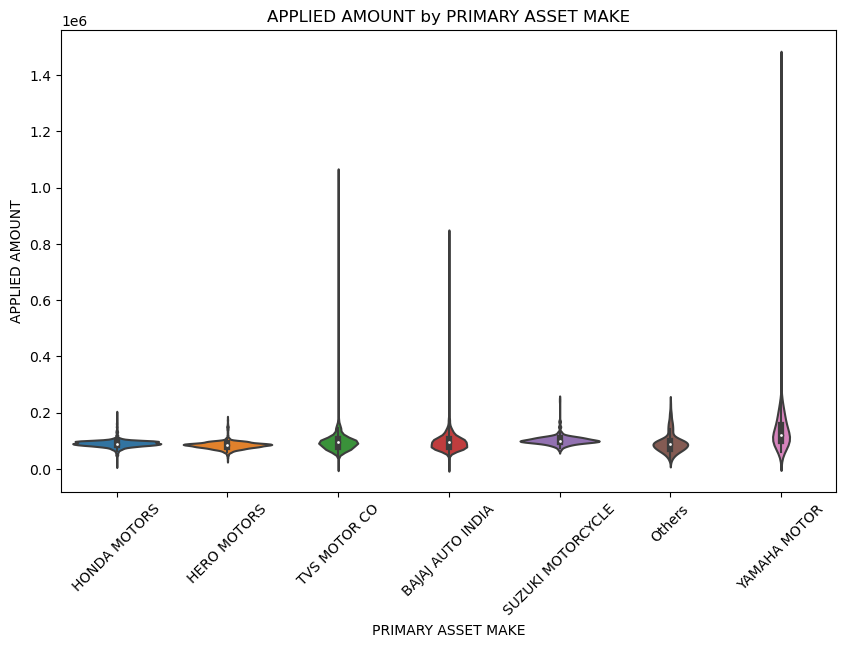

In [36]:
plot_violin(train,"PRIMARY ASSET MAKE","APPLIED AMOUNT")

**Insights**

1. **Distribution for Honda Motors, Hero Motors, Suzuki Motorcycle, and Others**:
   - For **Honda Motors, Hero Motors, Suzuki Motorcycle, and Others categories**, the distribution of **Applied Amount** is tightly centered around lower amounts.
   - These groups have fewer applicants applying for higher amounts, as evidenced by the limited spread and concentration near the lower end of the range.

2. **Distribution for Yamaha Motors**:
   - The distribution for **Yamaha Motors** is the widest, suggesting a large variability in the applied amounts for individuals.
   - A significant number of loans have lower amounts, but the long "tail" indicates that some individuals applied for much higher loan amounts.

3. **Distribution for TVS Motors and Bajaj Motors**:
   - The **TVS Motors** and **Bajaj Motors** categories show a narrower distribution compared to the **Yamaha Motors** category.
   - Most of the applied amounts are concentrated around a specific range, indicating that people with these brands typically apply for a more consistent range of amounts.

4. **General Trends**:
   - The distribution shows that people with **Yamaha Motors**, **TVS Motors**, and **Bajaj Motors** tend to apply for a broader range of amounts, while those with **Honda Motors**, **Hero Motors**, and **Suzuki Motorcycle** apply for smaller, more consistent amounts.

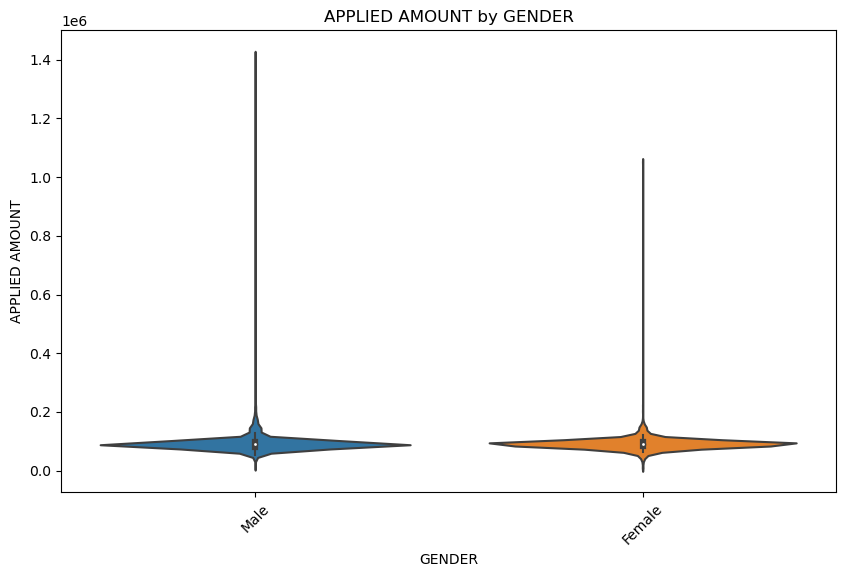

In [37]:
plot_violin(train,"GENDER","APPLIED AMOUNT")

**Insights**

1. **Distribution for Male**:
   - The distribution for **Male** is the widest, suggesting a large variability in the applied amounts.
   - Most of the applied amounts are concentrated around a specific range, indicating that male individuals typically apply for a more consistent range of amounts.
   - A long tail indicates that some males applied for higher loan amounts.

2. **Distribution for Female**:
   - The **Female** category shows a narrower distribution compared to the **Male** category.
   - Most of the applied amounts are concentrated around a specific range, indicating that female individuals typically apply for a more consistent range of amounts.
   - A long tail indicates that some females applied for higher loan amounts.

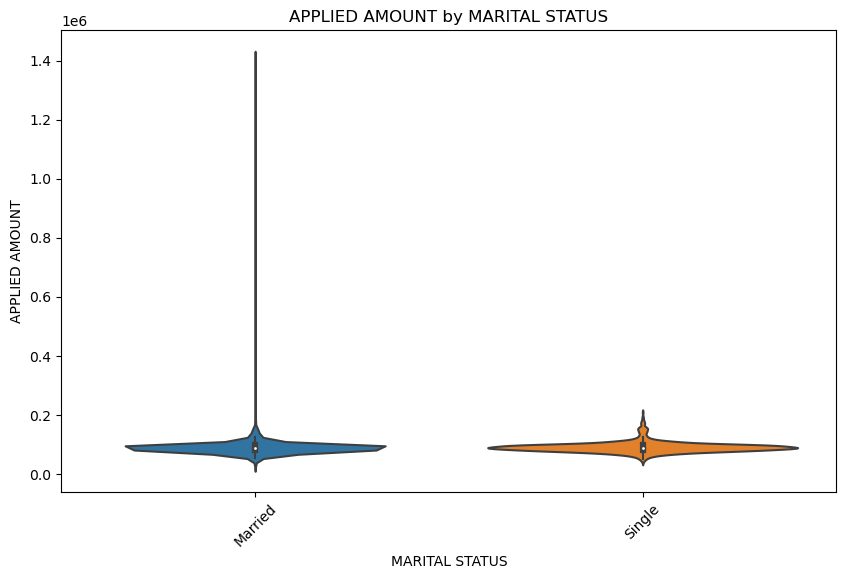

In [38]:
plot_violin(train,"MARITAL STATUS","APPLIED AMOUNT")

**Insights**

1. **Distribution for Married**:
   - The distribution for **Married** is the widest, suggesting a large variability in the applied amounts.
   - Most of the applied amounts are concentrated around a specific range, indicating that married individuals typically apply for a more consistent range of amounts.
   - A long tail indicates that some married individuals applied for higher loan amounts.

2. **Distribution for Single**:
   - The **Single** category shows a narrower distribution compared to the **Married** category.
   - Most of the applied amounts are concentrated around a specific range, indicating that single individuals typically apply for a more consistent range of amounts.


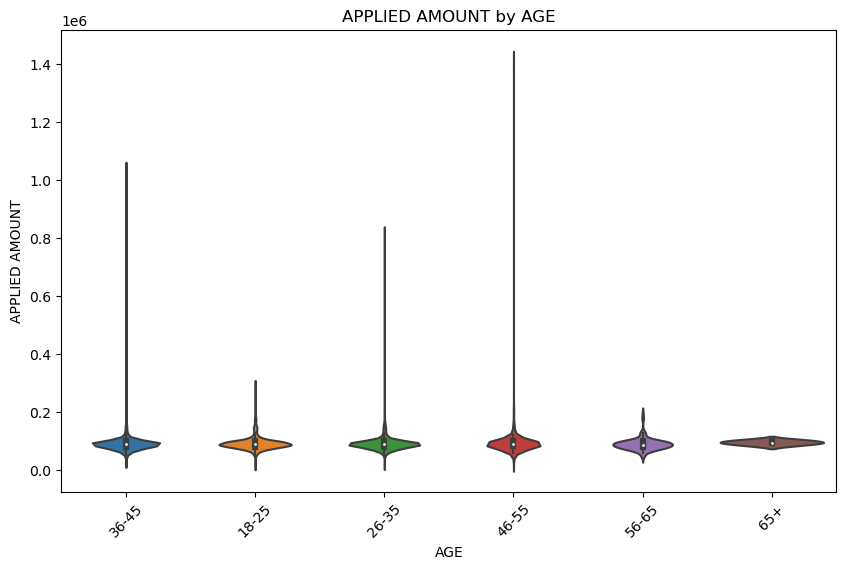

In [39]:
plot_violin(train,"AGE","APPLIED AMOUNT")

**Insights**
1. **Age Group 36-45**: This age group shows the widest range of applied loan amounts, with the largest spread and a few outliers indicating higher applied amounts. The density is mostly concentrated at the lower applied amounts, but there are individuals who applied for much larger loans.

2. **Age Group 46-55**: Similar to the 36-45 group, this age category also has a large spread, though the upper end is slightly lower than the 36-45 group. The concentration of applicants is more towards the lower applied amounts.

3. **Age Group 26-35**: This age group shows a narrower spread of applied amounts, with most of the density clustered around lower loan amounts. There are fewer outliers in this group.

4. **Younger Age Groups (18-25)**: These show lower applied amounts on average, with smaller spreads, indicating that younger applicants are likely applying for smaller loans.

5. **Older Age Groups (56-65, 65+)**: These age groups show smaller spreads and also appear to have lower applied amounts. The violin shapes are relatively narrow, meaning there are fewer high loan applications in these groups.

**Conclusion:**

* **Loan amount increases with middle age**: Middle-aged groups (36-45 and 46-55) tend to apply for higher loan amounts on average, with a broader distribution compared to other groups. This could suggest that individuals in these age groups are either more financially secure or are in a phase where they require larger loans (e.g., to purchase more expensive assets).
* **Younger and older applicants prefer smaller loans**: Younger applicants (18-25) and older applicants (65+) tend to apply for smaller loans, possibly due to lesser financial responsibility or needs, or more conservative borrowing behavior.


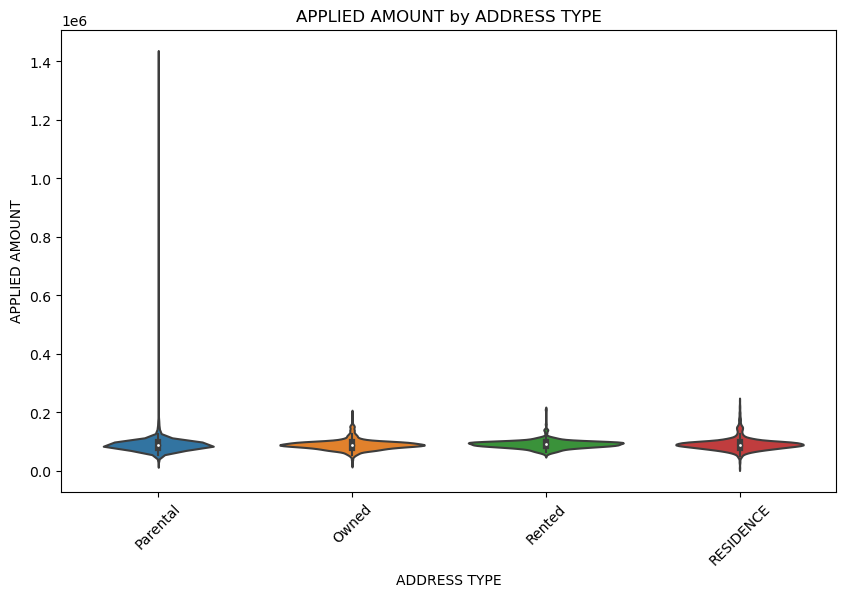

In [40]:
plot_violin(train,"ADDRESS TYPE","APPLIED AMOUNT")

**Insights**

1. **Distribution for Parental**:
   - The distribution for **Parental** is the widest, suggesting a large variability in the applied amounts.
   - Most of the applied amounts are concentrated around a specific range, indicating that people who live with their parents typically apply for a more consistent range of amounts.
   - A long tail indicates that some individuals from parental households applied for higher loan amounts.

2. **Distribution for Owned, Rented, and Residence**:
   - The **Owned, Rented, and Residence** category shows a narrower distribution compared to the **Parental** category.
   - Most of the applied amounts are concentrated around a specific range, indicating that individuals who own, rent, or reside in their own homes typically apply for a more consistent range of amounts.

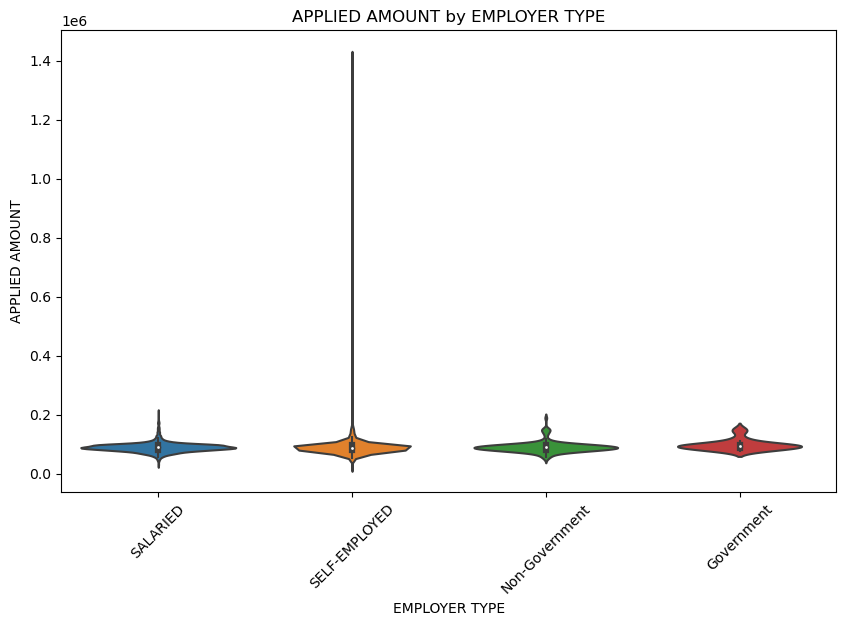

In [41]:
plot_violin(train,"EMPLOYER TYPE","APPLIED AMOUNT")

**Insights**

1. **Distribution for Self-Employed**:
   - The distribution for **Self-Employed** is the widest, suggesting a large variability in the applied amounts.
   - Most of the applied amounts are concentrated around a specific range, indicating that self-employed individuals typically apply for a more consistent range of amounts.
   - A long tail indicates that some self-employed individuals applied for higher loan amounts.

2. **Distribution for Salaried, Non-Government, and Government**:
   - The **Salaried, Non-Government, and Government** category shows a narrower distribution compared to the **Self-Employed** category.
   - Most of the applied amounts are concentrated around a specific range, indicating that salaried, non-government, and government employees typically apply for a more consistent range of amounts.

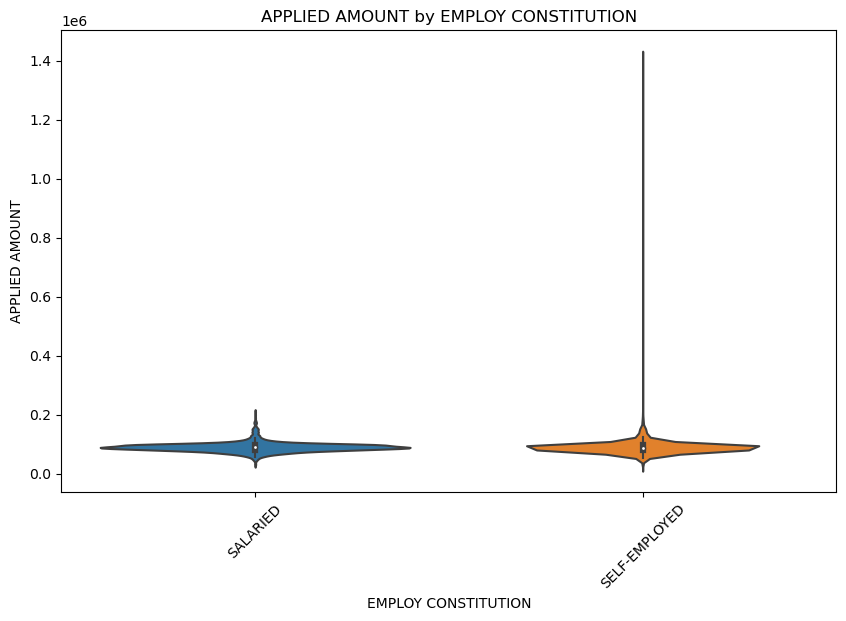

In [42]:
plot_violin(train,"EMPLOY CONSTITUTION","APPLIED AMOUNT")

**Insights**

1. **Distribution for Self-Employed**:
   - The distribution for **Self-Employed** is the widest, suggesting a large variability in the applied amounts.
   - Most of the applied amounts are concentrated around a specific range, indicating that self-employed individuals typically apply for a more consistent range of amounts.
   - A long tail indicates that some self-employed individuals applied for higher loan amounts.

2. **Distribution for Salaried**:
   - The **Salaried** category shows a narrower distribution compared to the **Self-Employed** category.
   - Most of the applied amounts are concentrated around a specific range, indicating that salaried individuals typically apply for a more consistent range of amounts.

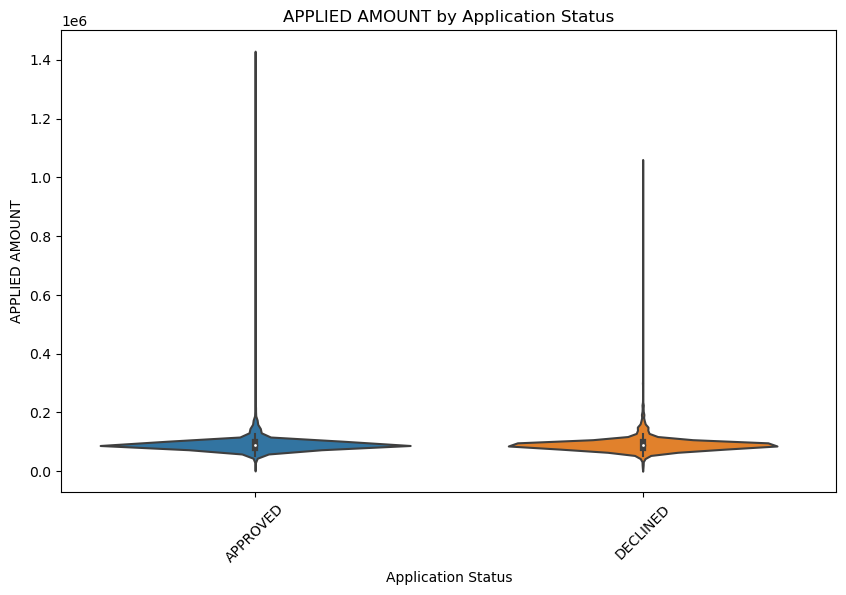

In [43]:
plot_violin(train,"Application Status","APPLIED AMOUNT")

**Insights**

1. **Distribution for Approved**:
   - The distribution for **Approved** is the widest, suggesting a large variability in the applied amounts.
   - Most of the applied amounts are concentrated around a specific range, indicating that approved loan applications typically have a more consistent range of amounts.
   - A long tail indicates that some approved loan applications had higher loan amounts.

2. **Distribution for Declined**:
   - The **Declined** category shows a narrower distribution compared to the **Approved** category.
   - Most of the applied amounts are concentrated around a specific range, indicating that declined loan applications typically have a more consistent range of amounts.

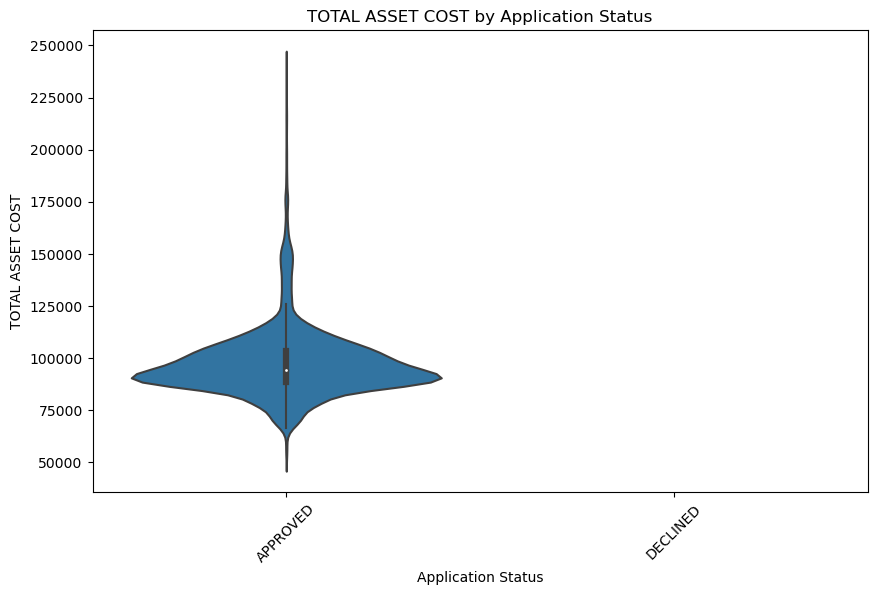

In [44]:
plot_violin(train,"Application Status","TOTAL ASSET COST")

**Insights:**

1. **Approved Applications**:
   - The plot for approved applications is the widest, indicating a broader range of total asset costs.
   - The median of the approved applications is concentrated between **₹100,000 and ₹125,000**.
   - There are applications with higher total asset costs, reaching up to **₹225,000**. However, these high-cost assets are less frequent, as represented by the tapering tail of the violin plot.
   - The density of applicants is highest in the lower total asset cost range (between **₹75,000 and ₹125,000**), indicating that a significant number of applicants with lower asset costs are approved.

2. **Declined Applications**:
   - No data is shown for declined applications, suggesting that either:
   - There were no loans associated with a declined application, or
   - The total asset cost for declined applications was not captured in the dataset.

## Categorical vs Categorical 

In [45]:
def plot_count(df, categorical_column, hue_column):
    """
    Creates a count plot for a categorical column with a hue for another categorical column.
    
    Parameters:
    - df: The DataFrame containing the data.
    - categorical_column: The name of the categorical column (str).
    - hue_column: The name of the column used for hue (str).
    """
    plt.figure(figsize=(10, 6))
    sns.countplot(x=categorical_column, hue=hue_column, data=df)
    plt.title(f'{hue_column} by {categorical_column}')
    plt.xlabel(categorical_column)
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.show()

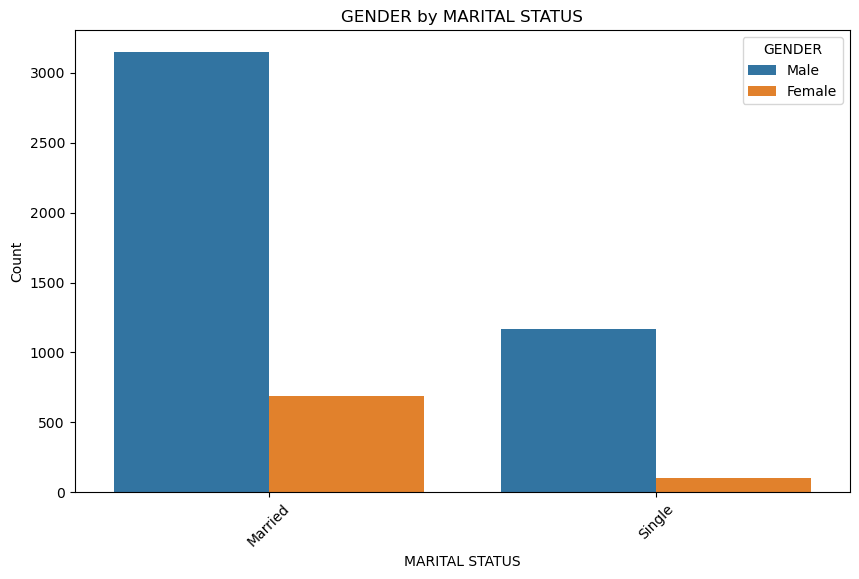

In [46]:
# Example of calling the function:
plot_count(df=train, categorical_column='MARITAL STATUS', hue_column='GENDER')

**Insights**

1. **Majority Category**:
   - The majority of married individuals are **Male**, with a significantly higher count of around **3000+**.
   - A smaller but noticeable proportion of married individuals are **Female**, with a count of roughly around **500**.

**Key Findings:**

* Married individuals are predominantly **Male**, with a significantly higher count compared to married **Female** individuals.
* This suggests that married individuals are more likely to be male, and that the majority of married males outnumber married females.

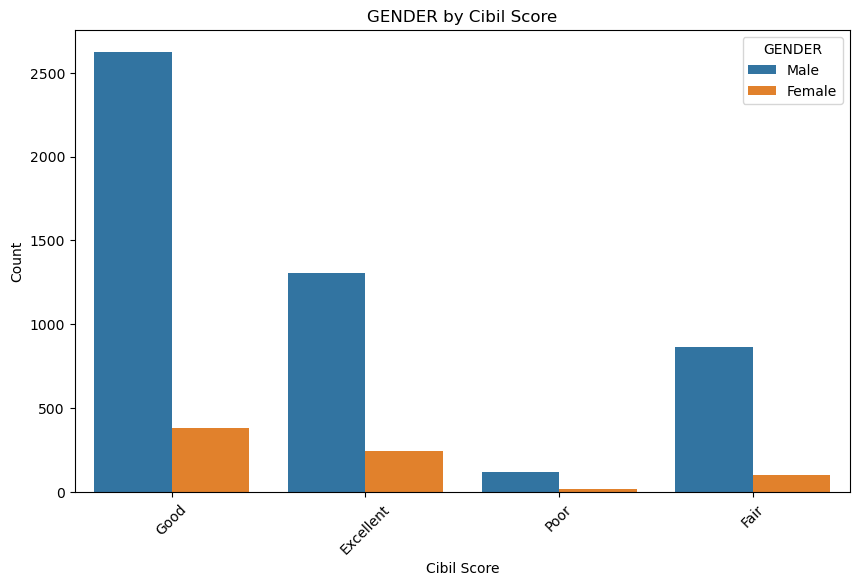

In [47]:
# Example of calling the function:
plot_count(df=train, categorical_column='Cibil Score', hue_column='GENDER')

**Insights:**
   - Most people with a good credit score are **men**. There are over **2,500** men with a good credit score.
   - A smaller number of people with a good credit score are **women**. There are around **350** women with a good credit score.
   - This shows that more men and women have a good credit score compared to others.

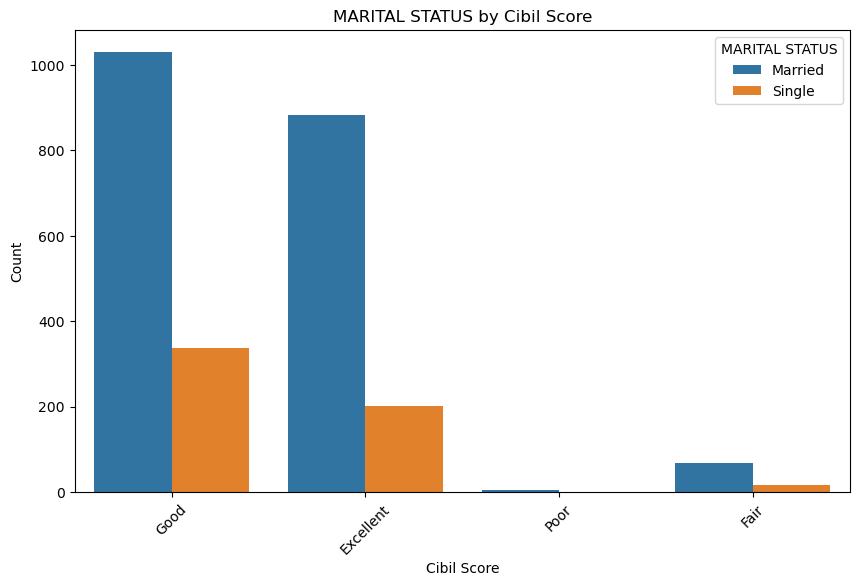

In [48]:
plot_count(df=train, categorical_column='Cibil Score', hue_column='MARITAL STATUS')

**Insights**
* Most people with good credit scores are **Married**. There are many more of them, around **1000+**.
* A smaller but noticeable group of people with good credit scores are **Unmarried**. There are roughly **350** unmarried females with good credit scores.

**Key Findings:**
* Most people who are **Married** have good credit scores. This means that married people are more likely to have good credit scores, and there are many more of them compared to unmarried people.

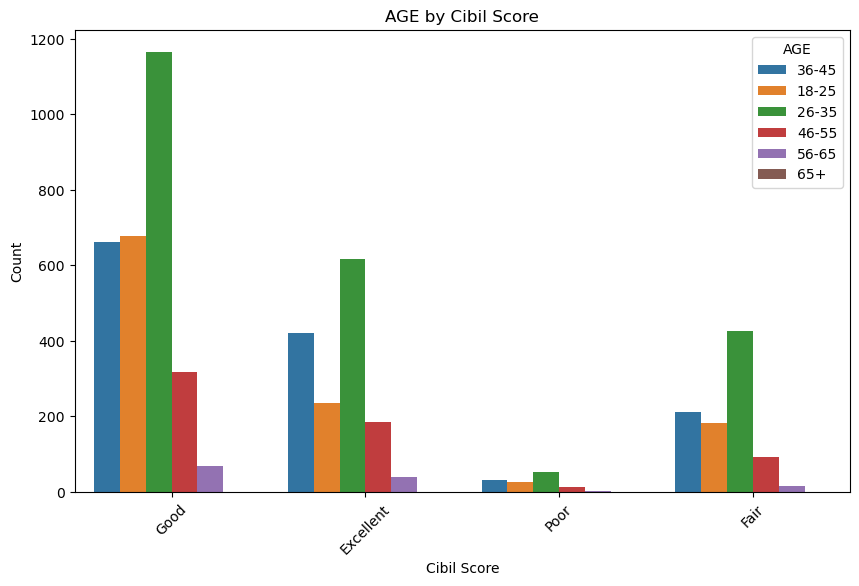

In [49]:
plot_count(df=train, categorical_column='Cibil Score', hue_column='AGE')

**Insights**:
* Most people with good credit scores are between **26-35 years old**. There are many more of them, around **1100+**.
* A smaller group of people with good credit scores are between **56-65 years old**. There are roughly **100** people in this age range with good credit scores.

**Key Findings:**
* People between the ages of 26-35 are more likely to have good credit scores. This means that most people in this age range have good credit scores, and there are many more of them compared to other age ranges.

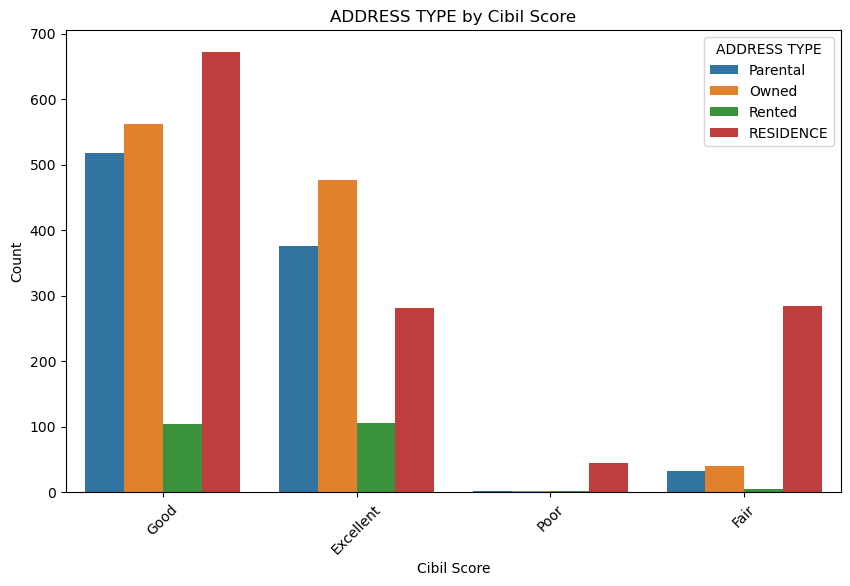

In [50]:
plot_count(df=train, categorical_column='Cibil Score', hue_column='ADDRESS TYPE')

**Insights:**
* Most people with good credit scores are **homeowners**. There are many more of them, around **650+**.
* A smaller group of people with good credit scores are **people who rent their homes**. There are roughly **90** people who rent their homes with good credit scores.

**Key Findings:**
* People who own their homes are more likely to have good credit scores. This means that most homeowners have good credit scores, and there are many more of them compared to people who rent their homes.

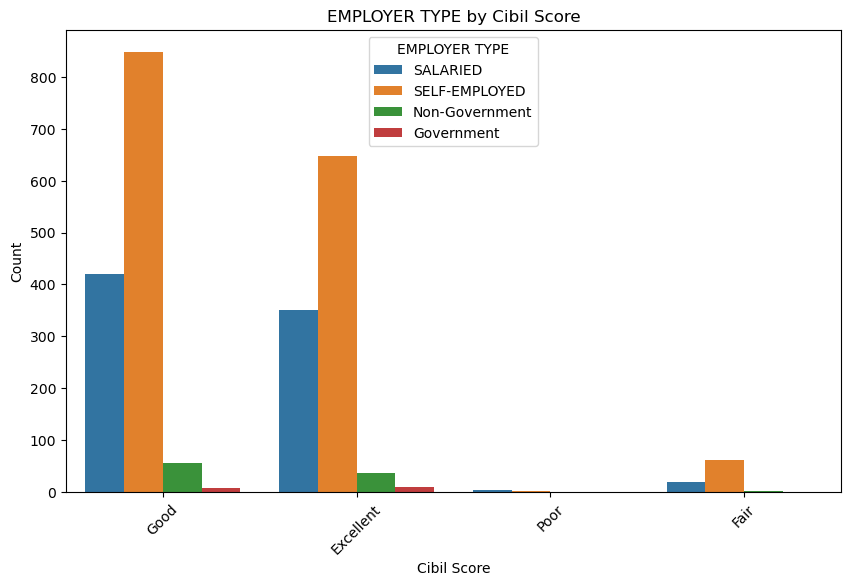

In [51]:
plot_count(df=train, categorical_column='Cibil Score', hue_column='EMPLOYER TYPE')

**Insights:**
* Most people with good credit scores are **self-employed**. There are many more of them, around **880+**.
* A smaller group of people with good credit scores are **government employees**. There are very few government employees with good credit scores, almost **0**.

**Key Findings:**
* Self-employed individuals are more likely to have good credit scores. This means that most self-employed people have good credit scores, and there are many more of them compared to government employees.


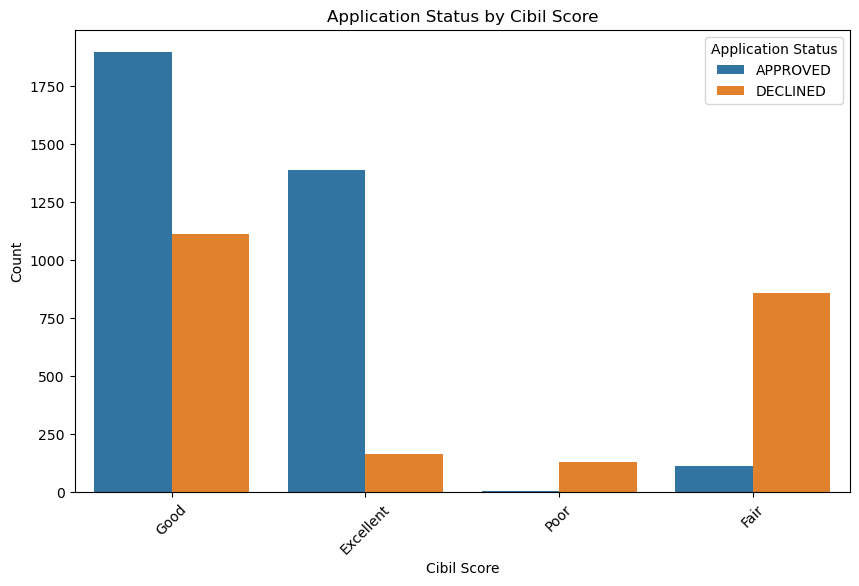

In [52]:
plot_count(df=train, categorical_column='Cibil Score', hue_column='Application Status')

**Insights:**
* Most people with good credit scores are **approved**. There are many more of them, around **1750+**.

**Key Findings:**
* People with good credit scores are more likely to be approved for a loan. This means that having a good credit score increases the chances of getting approved for a loan compared to others.


## Encoding the Variables
**Binary Encoding**
1. When applying binary encoding to a categorical column it transforms each unique category into a sequence of binary digits (0s and 1s). This is a compact representation compared to one-hot encoding, which creates one column per category
2. With binary encoding, you only need ceil(log2(24)) = 5 columns to represent the same information.
3. Each unique category still has a unique representation in binary format, so there’s no information loss.

In [56]:
import category_encoders as ce

# Specify the columns you want to apply binary encoding to
binary_columns = ['HDB BRANCH STATE', 'MARITAL STATUS', 'GENDER','AGE', 'ADDRESS TYPE',
                                    'EMPLOY CONSTITUTION', 'EMPLOYER TYPE','ASSET CTG','ASSET MODEL NO','PRIMARY ASSET MAKE']

# Initialize BinaryEncoder
binary_encoder = ce.BinaryEncoder(cols=binary_columns)

# Fit and transform the train data
train = binary_encoder.fit_transform(train)

# Manually convert this into numerical representation.
train['Cibil Score'] = train['Cibil Score'].replace({"Poor":0,"Fair":1, "Good":3, "Excellent":4})
train['phone_phoneFootprintStrengthOverall'] = train['phone_phoneFootprintStrengthOverall'].replace({"Very Low":1, "Low":1,"Medium":2,"High":3,"Very High":4})
train['Application Status'] = train['Application Status'].replace({"APPROVED":1,"DECLINED":0})


### Drop the reduntant columns
train=train.drop(columns=['DEALER ID','APPLICATION LOGIN DATE','HDB BRANCH NAME','FIRST NAME',
                    'LAST NAME','DEALER NAME','Personal Email Address', 'EMPLOYER NAME','Primary Asset Model No',
                    'DOB','Pan Name', 'name', 'vpa', 'upi_name'])

In [57]:
train.shape

(9991, 51)

### saved the clean dataset to make prediction

In [58]:
train.to_csv('train_clean.csv',index= False)